In [1]:
import numpy as np
import matplotlib.pyplot as plt

# get data
eeg_data = np.genfromtxt("data/joined.csv", delimiter=",").astype(np.float32)
eeg_data.shape

(12, 170752)

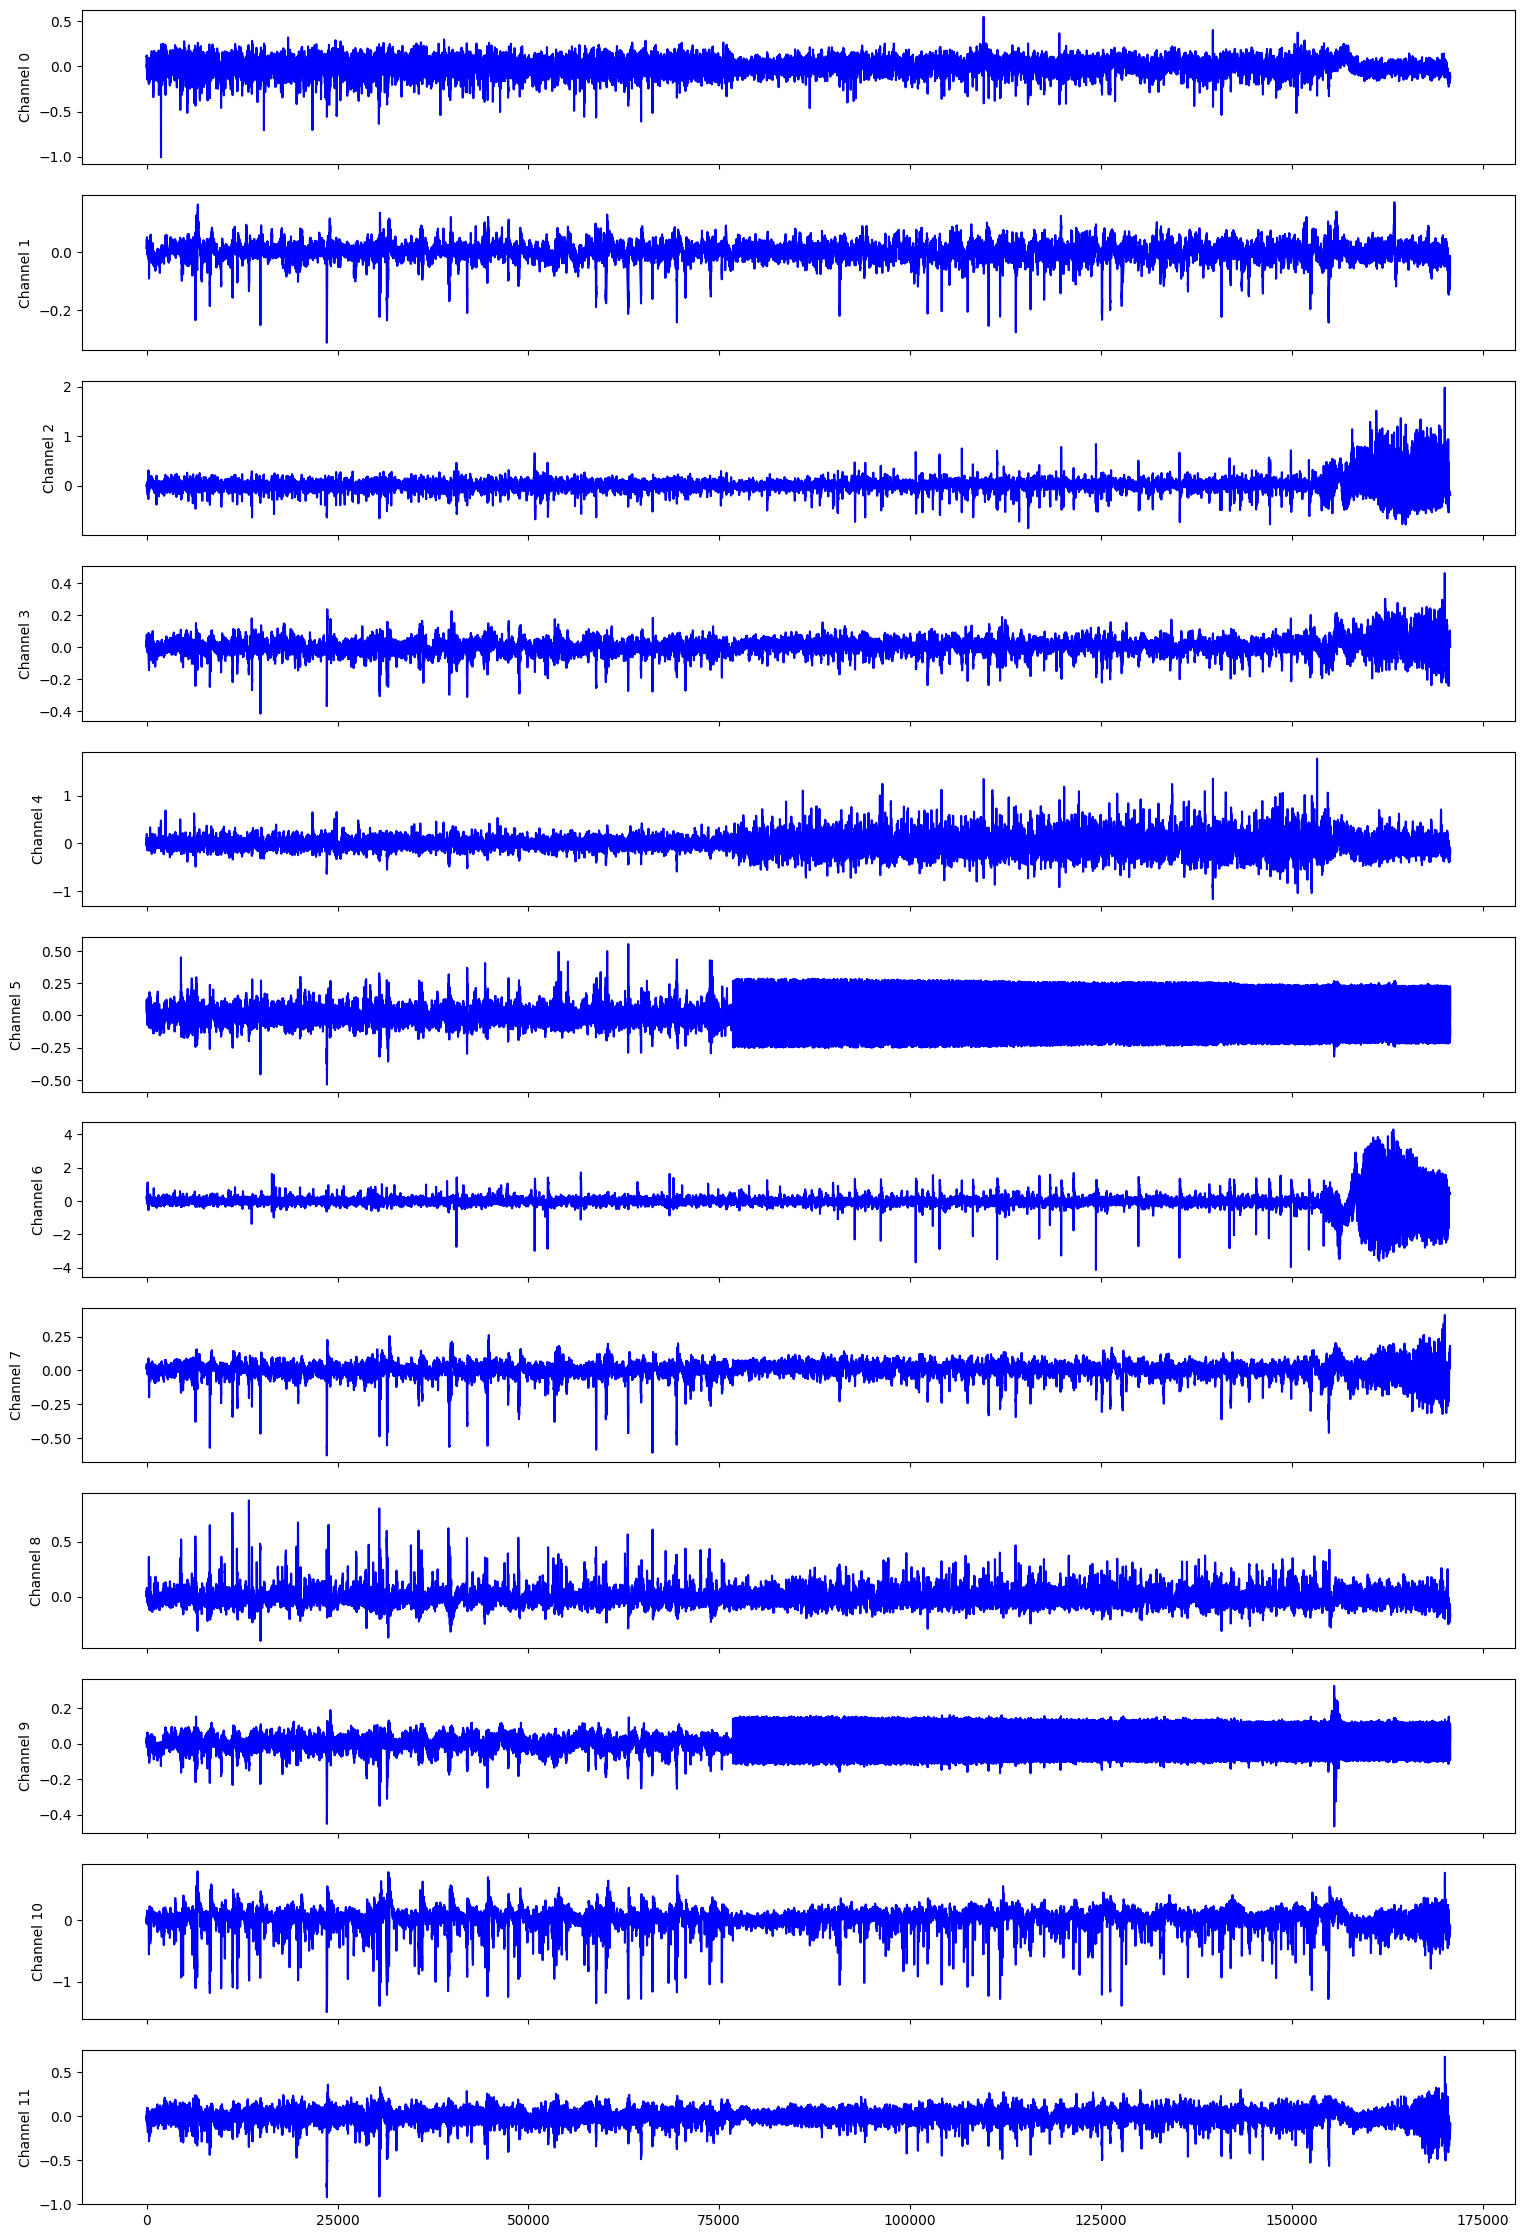

In [2]:
# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 28.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

In [3]:
from importlib import reload
import CPD.benchwarm

reload(CPD.benchwarm)

<module 'CPD.benchwarm' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\benchwarm.py'>

## Non-Seizure to Pre-Seizure

Detected change point at `t=82176`. 48.5 seconds past actual change-point (6176 ts).

In [4]:
# put arrays in dictionary for labels
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i]

In [5]:
# warm up for 15 seconds and determine best lags
# (warms up in ~3 mins)
arpwarm = CPD.benchwarm.ARPWarm(channels, n0=15, chunks=4)
arpwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
channel_0: order AR(20)
channel_0: fitting complete
AIC:-9933.716630173409
Log-Likelihood:4988.858315086704
channel_0: innovations generated
Mean:1.5132924153548582e-15
Std-dev:0.01751577394278455

channel_2: order AR(53)
channel_2: fitting complete
AIC:-11931.571300038253
Log-Likelihood:6020.7856500191265
channel_2: innovations generated
Mean:-5.869850817394173e-16
Std-dev:0.009621226265888906

channel_1: order AR(114)
channel_1: fitting complete
AIC:-15020.686171824498
Log-Likelihood:7626.343085912249
channel_1: innovations generated
Mean:-7.523666690271946e-17
Std-dev:0.0035467632024119475

['channel_3', 'channel_4', 'channel_5']
channel_4: order AR(7)
channel_4: fitting complete
AIC:-8866.555339634813
Log-Likelihood:4442.277669817407
channel_4: innovations generated
Mean:3.0584816203735364e-17
Std-dev:0.023728201526284205

channel_5: order AR(23)
channel_5: fitting complete
AIC:-10119.89681010132
Log-Likelihood:5084.94840505066
channel_5: inn

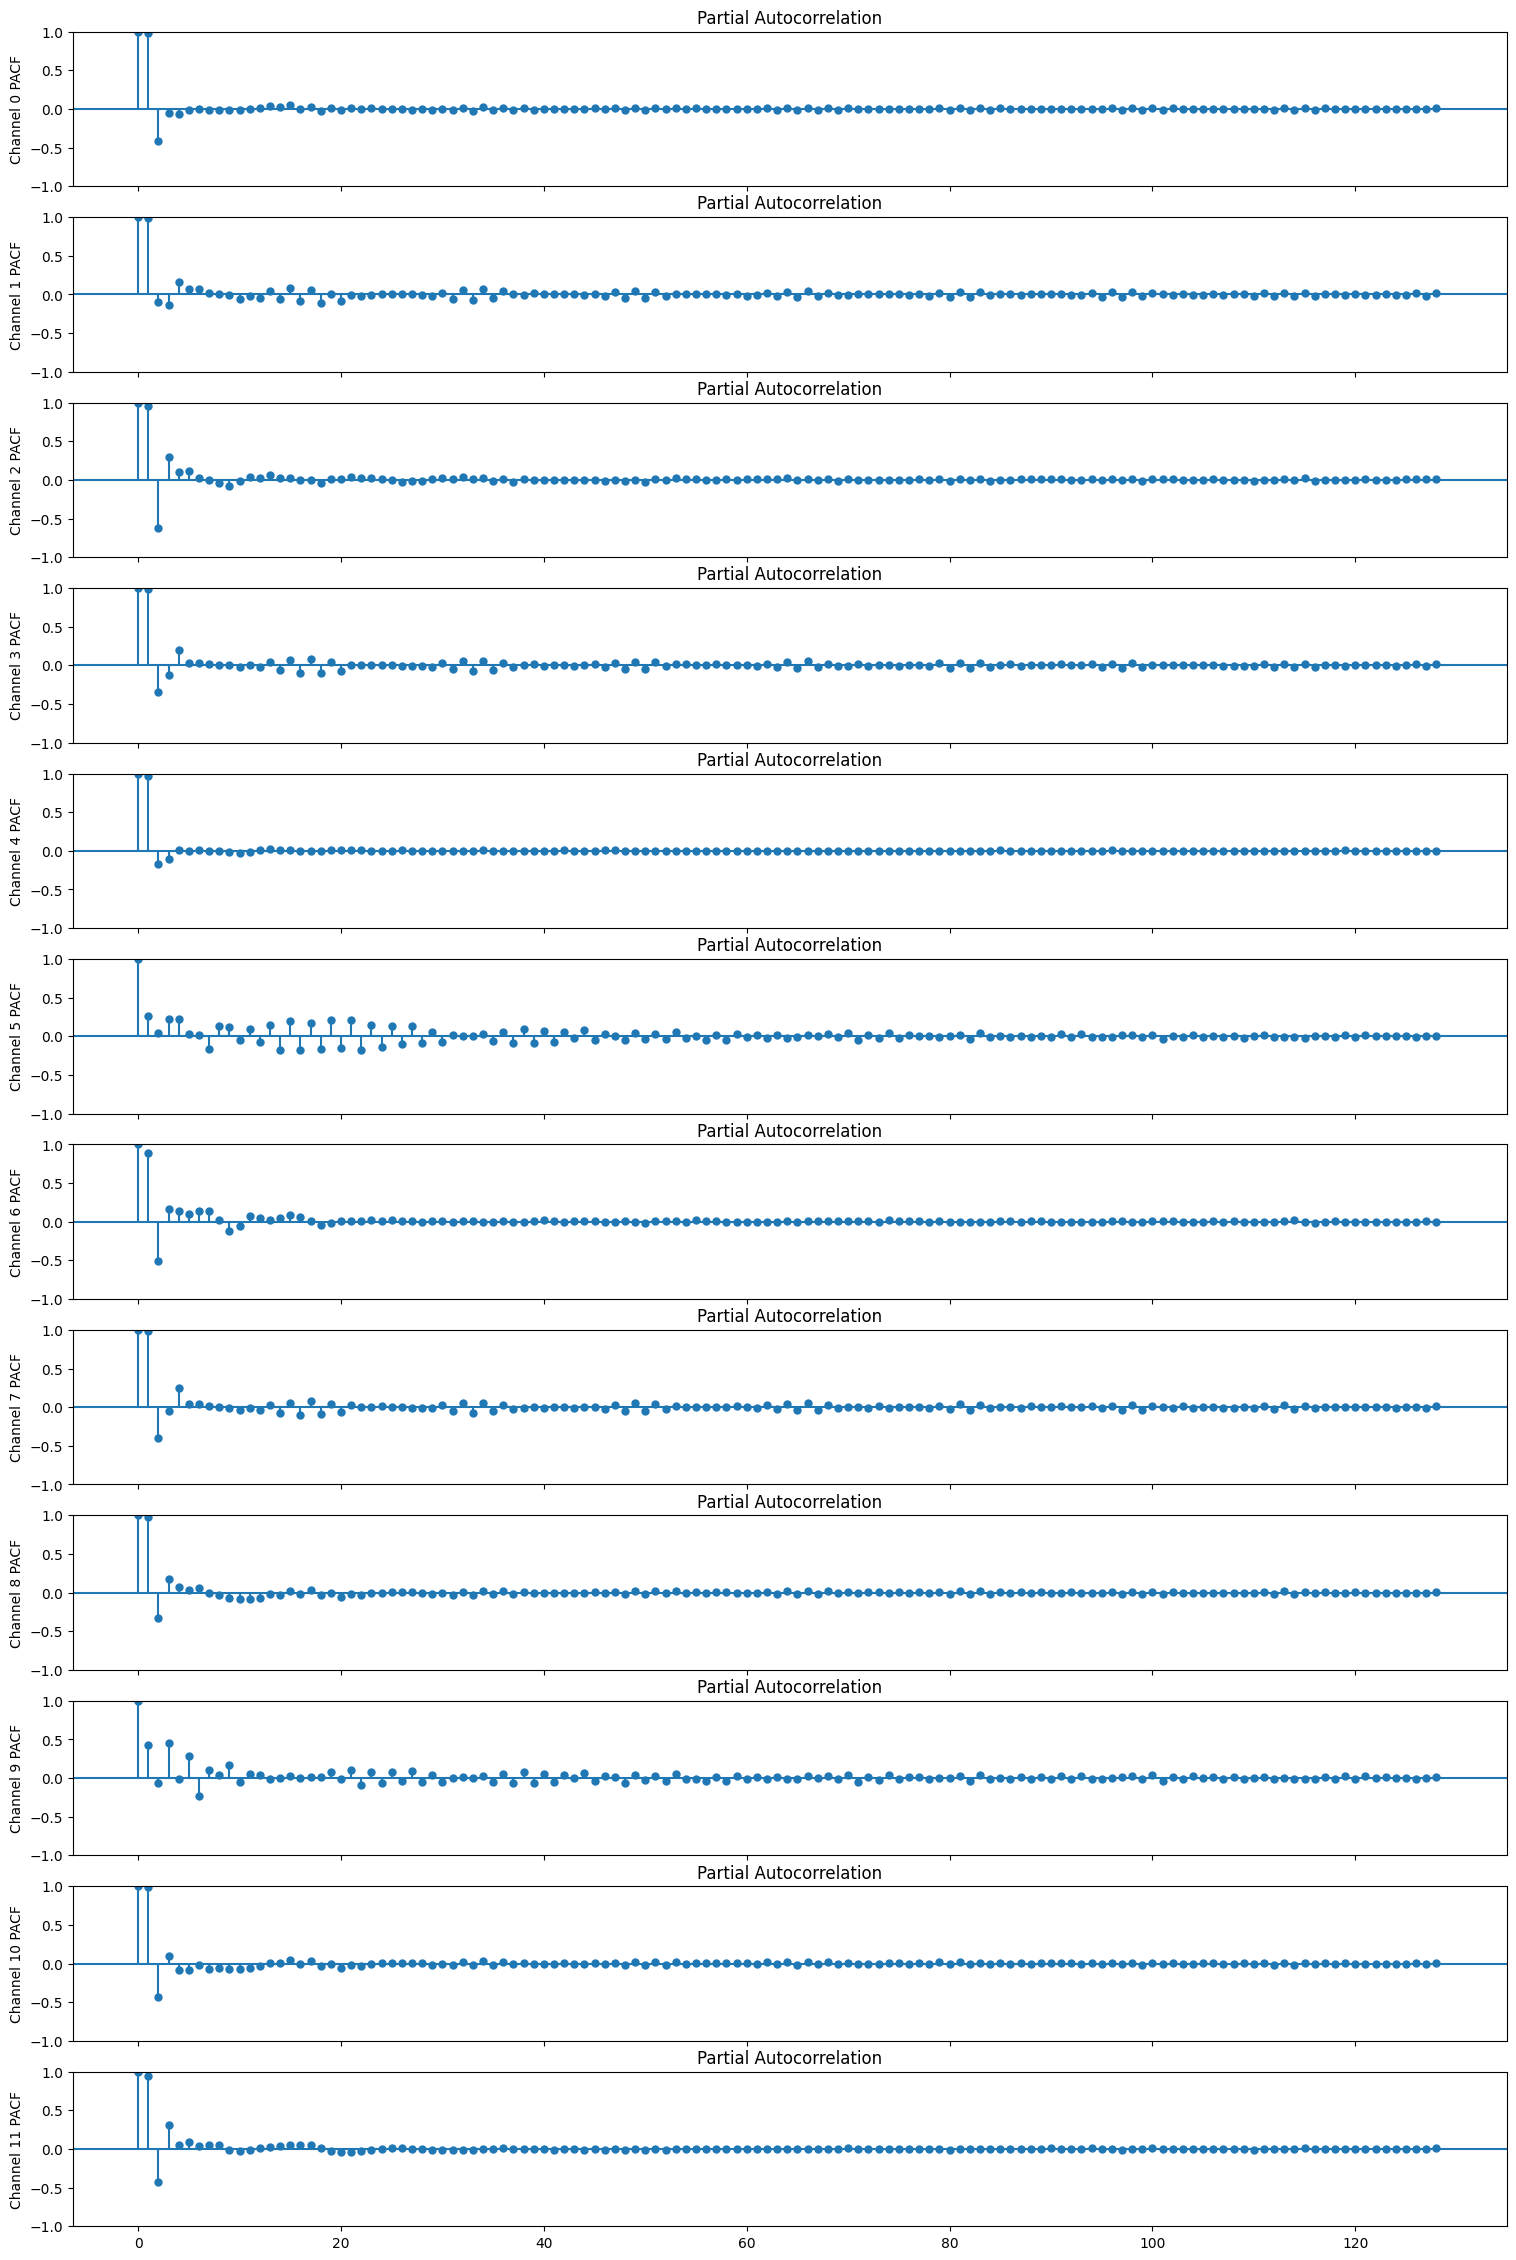

In [15]:
# explore PACF

from statsmodels.graphics.tsaplots import plot_pacf

time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 28.5)

for c in range(eeg_data.shape[0]):
    ts = channels[f"channel_{c}"][15*128:]
    plot_pacf(ts, ax=axs[c], lags=128)
    axs[c].set_ylabel(f"Channel {c} PACF")

In [6]:
import CPD.benchmark
reload(CPD.benchmark)

<module 'CPD.benchmark' from 'c:\\Users\\saidmf\\Desktop\\Projects\\eeg-regime-change\\CPD\\benchmark.py'>

In [7]:
cpd = CPD.benchmark.Online(arpwarm, k=2, M=11)

In [8]:
change_points, forecasts = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")
# AIMING FOR cp = 76800

STEP 15
channel_1 rejection incremented 1
channel_7 rejection incremented 1
channel_3 rejection incremented 1
STEP 16
channel_1 resetting rejection
channel_3 resetting rejection
channel_7 resetting rejection
STEP 17
channel_10 rejection incremented 1
channel_7 rejection incremented 1
STEP 18
channel_1 rejection incremented 1
channel_9 rejection incremented 1
channel_10 resetting rejection
channel_7 resetting rejection
channel_11 rejection incremented 1
STEP 19
channel_1 rejection incremented 2
channel_9 rejection incremented 2
channel_2 rejection incremented 1
channel_4 rejection incremented 1
channel_7 rejection incremented 1
channel_3 rejection incremented 1
channel_11 resetting rejection
STEP 20
channel_1 rejection incremented 3
channel_9 resetting rejection
channel_2 resetting rejection
channel_4 resetting rejection
channel_3 rejection incremented 2
channel_7 resetting rejection
STEP 21
channel_1 resetting rejection
channel_3 resetting rejection
STEP 22
channel_3 rejection incremen

In [16]:
change_points

{'channel_1': 38912, 'channel_3': 82176}

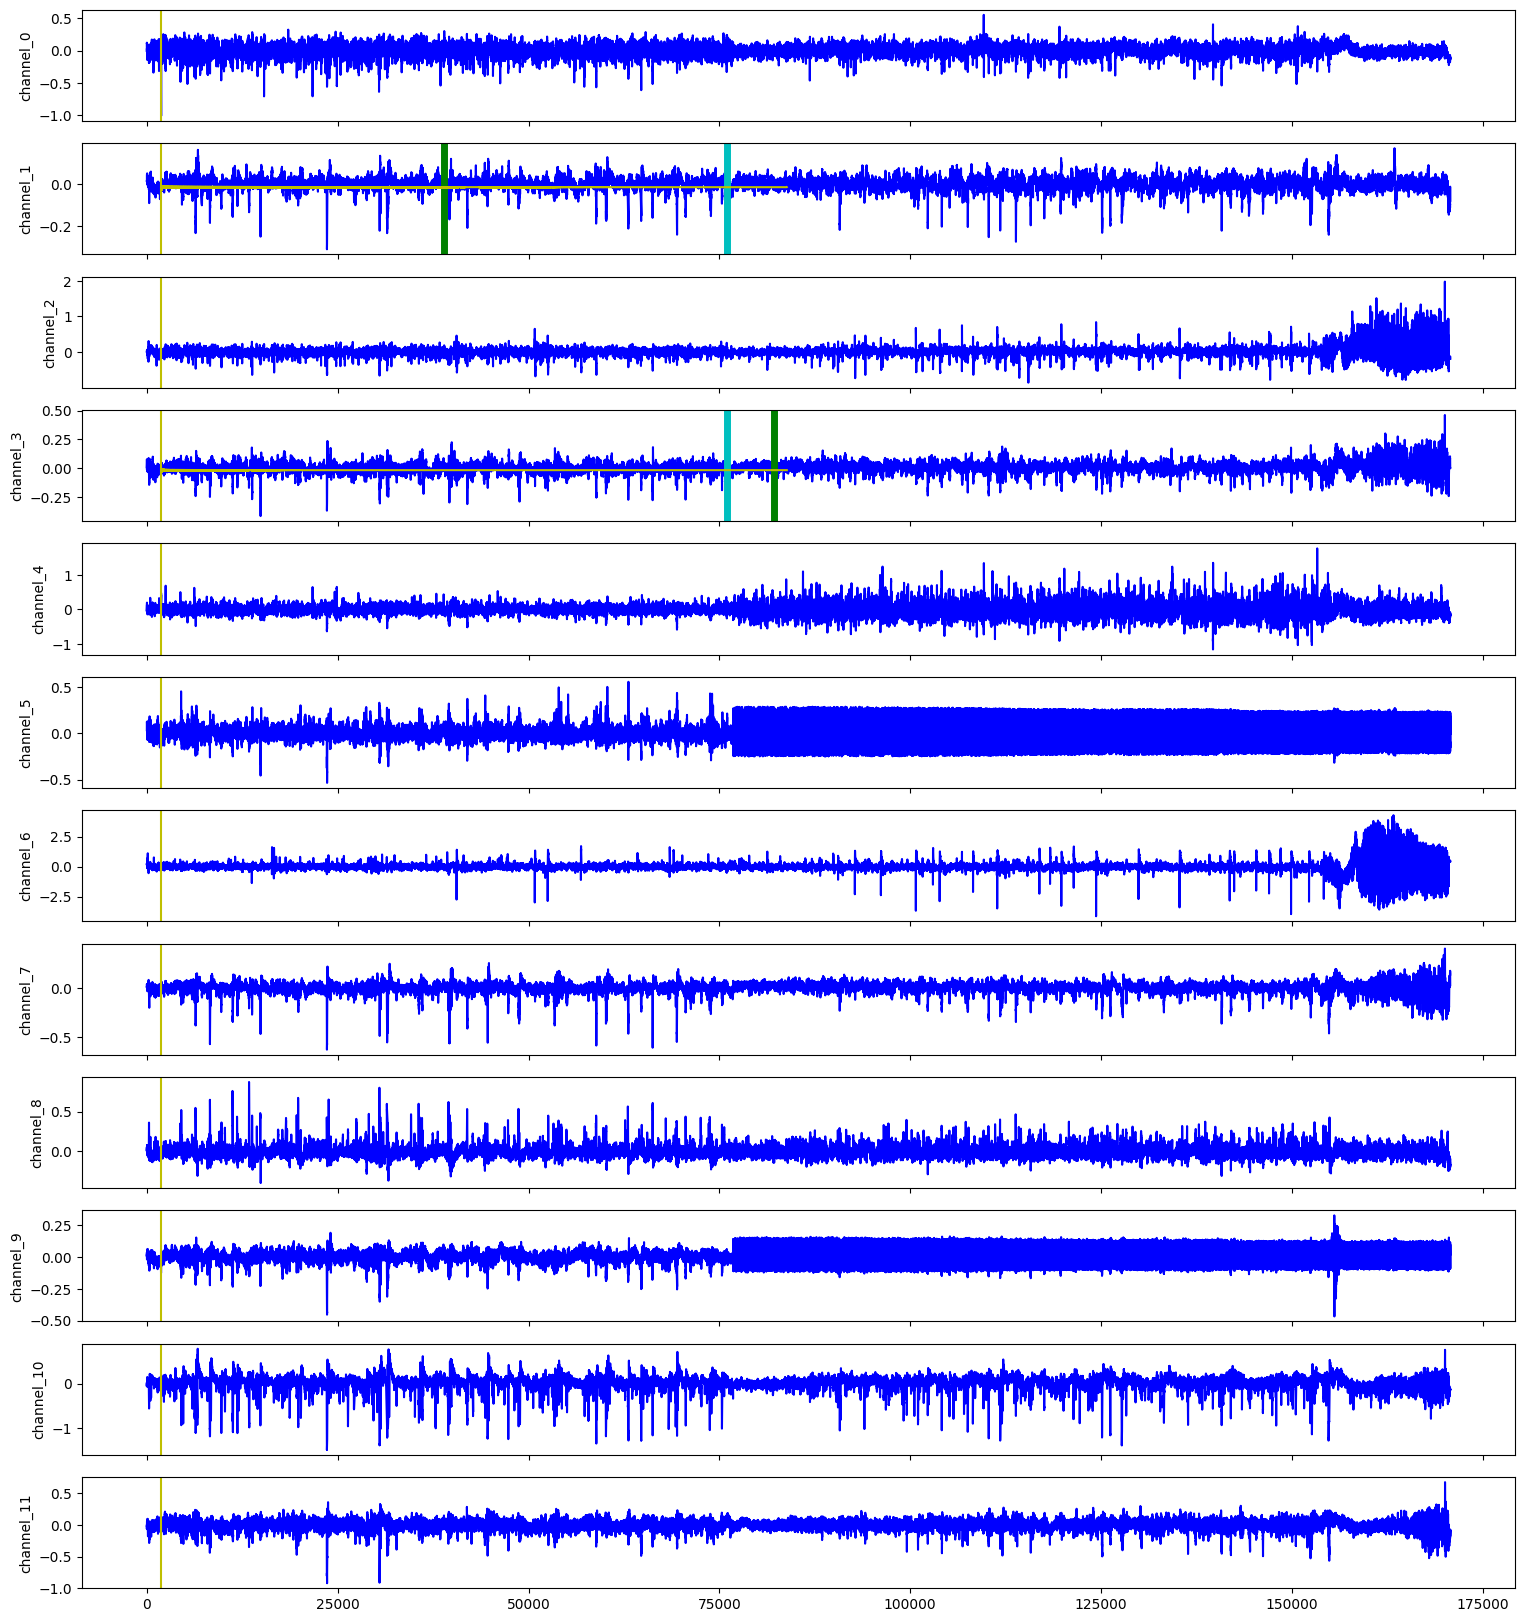

In [36]:
time = [i for i in range(eeg_data.shape[1])]
warmup = 15 * 128
actual_change = 76000

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')
    
    axs[c].axvline(x=warmup, c='y')
    if chan in change_points:
        cpt = change_points[chan]
        axs[c].axvline(x=cpt, c='g', linewidth=5)
        axs[c].axvline(x=actual_change, c='c', linewidth=5)
        fore_time = [warmup + i for i in range(len(forecasts[chan]))]
        axs[c].plot(fore_time, forecasts[chan], 'y')
    axs[c].set_ylabel(chan)

## Pre-Seizure to Seizure

Detected change point at `t=73344`. 20.75 seconds past actual change-point (2656 ts).

In [10]:
# get data past detected change-point `t=82176`

post_channels = {}
for i in range(len(eeg_data)):
    post_channels[f"channel_{i}"] = eeg_data[i][cpt:]

In [11]:
# warm up for 10 seconds and determine best lags
# (warms up in ~7 mins)

arpwarm = CPD.benchwarm.ARPWarm(post_channels, n0=10, chunks=4)
arpwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


channel_0: order AR(7)
channel_0: fitting complete
AIC:-7726.577184489139
Log-Likelihood:3872.2885922445694
channel_0: innovations generated
Mean:4.743521626815574e-16
Std-dev:0.011553126670341338

channel_2: order AR(12)
channel_2: fitting complete
AIC:-8123.400838681588
Log-Likelihood:4075.700419340794
channel_2: innovations generated
Mean:8.61167078761887e-16
Std-dev:0.009723464326048484

channel_1: order AR(20)
channel_1: fitting complete
AIC:-10450.73383896127
Log-Likelihood:5247.366919480635
channel_1: innovations generated
Mean:4.564470494694022e-16
Std-dev:0.003759326524577283

channel_5: order AR(45)
channel_5: fitting complete
AIC:-6977.397040477352
Log-Likelihood:3535.698520238676
channel_5: innovations generated
Mean:-2.89579426564679e-16
Std-dev:0.013817044851894583

channel_4: order AR(7)
channel_4: fitting complete
AIC:-4147.52558468422
Log-Likelihood:2082.76279234211
channel_4: innovations generated
Mean:-9.767869501808133e-18
Std-dev:0.0471206276828729

channel_3: orde

In [12]:
cpd_seiz = CPD.benchmark.Online(arpwarm, k=2, M=11)

In [13]:
seiz_change_points, seiz_forecasts = cpd_seiz.run()

seiz_cpt = max(seiz_change_points.values())

print(f"change point detected at t={seiz_cpt}")
# AIMING FOR cp = 76800

STEP 10
STEP 11
channel_8 rejection incremented 1
channel_1 rejection incremented 1
channel_10 rejection incremented 1
STEP 12
channel_8 resetting rejection
channel_1 resetting rejection
channel_10 resetting rejection
STEP 13
STEP 14
channel_9 rejection incremented 1
channel_10 rejection incremented 1
STEP 15
channel_1 rejection incremented 1
channel_9 resetting rejection
channel_10 resetting rejection
STEP 16
channel_1 resetting rejection
STEP 17
channel_3 rejection incremented 1
STEP 18
channel_10 rejection incremented 1
channel_3 resetting rejection
STEP 19
channel_10 resetting rejection
STEP 20
STEP 21
channel_8 rejection incremented 1
channel_1 rejection incremented 1
channel_7 rejection incremented 1
STEP 22
channel_8 resetting rejection
channel_1 resetting rejection
channel_7 resetting rejection
channel_3 rejection incremented 1
STEP 23
channel_3 resetting rejection
STEP 24
STEP 25
channel_5 rejection incremented 1
channel_10 rejection incremented 1
STEP 26
channel_5 resetting r

In [17]:
seiz_change_points

{'channel_10': 44160, 'channel_2': 73344}

69824


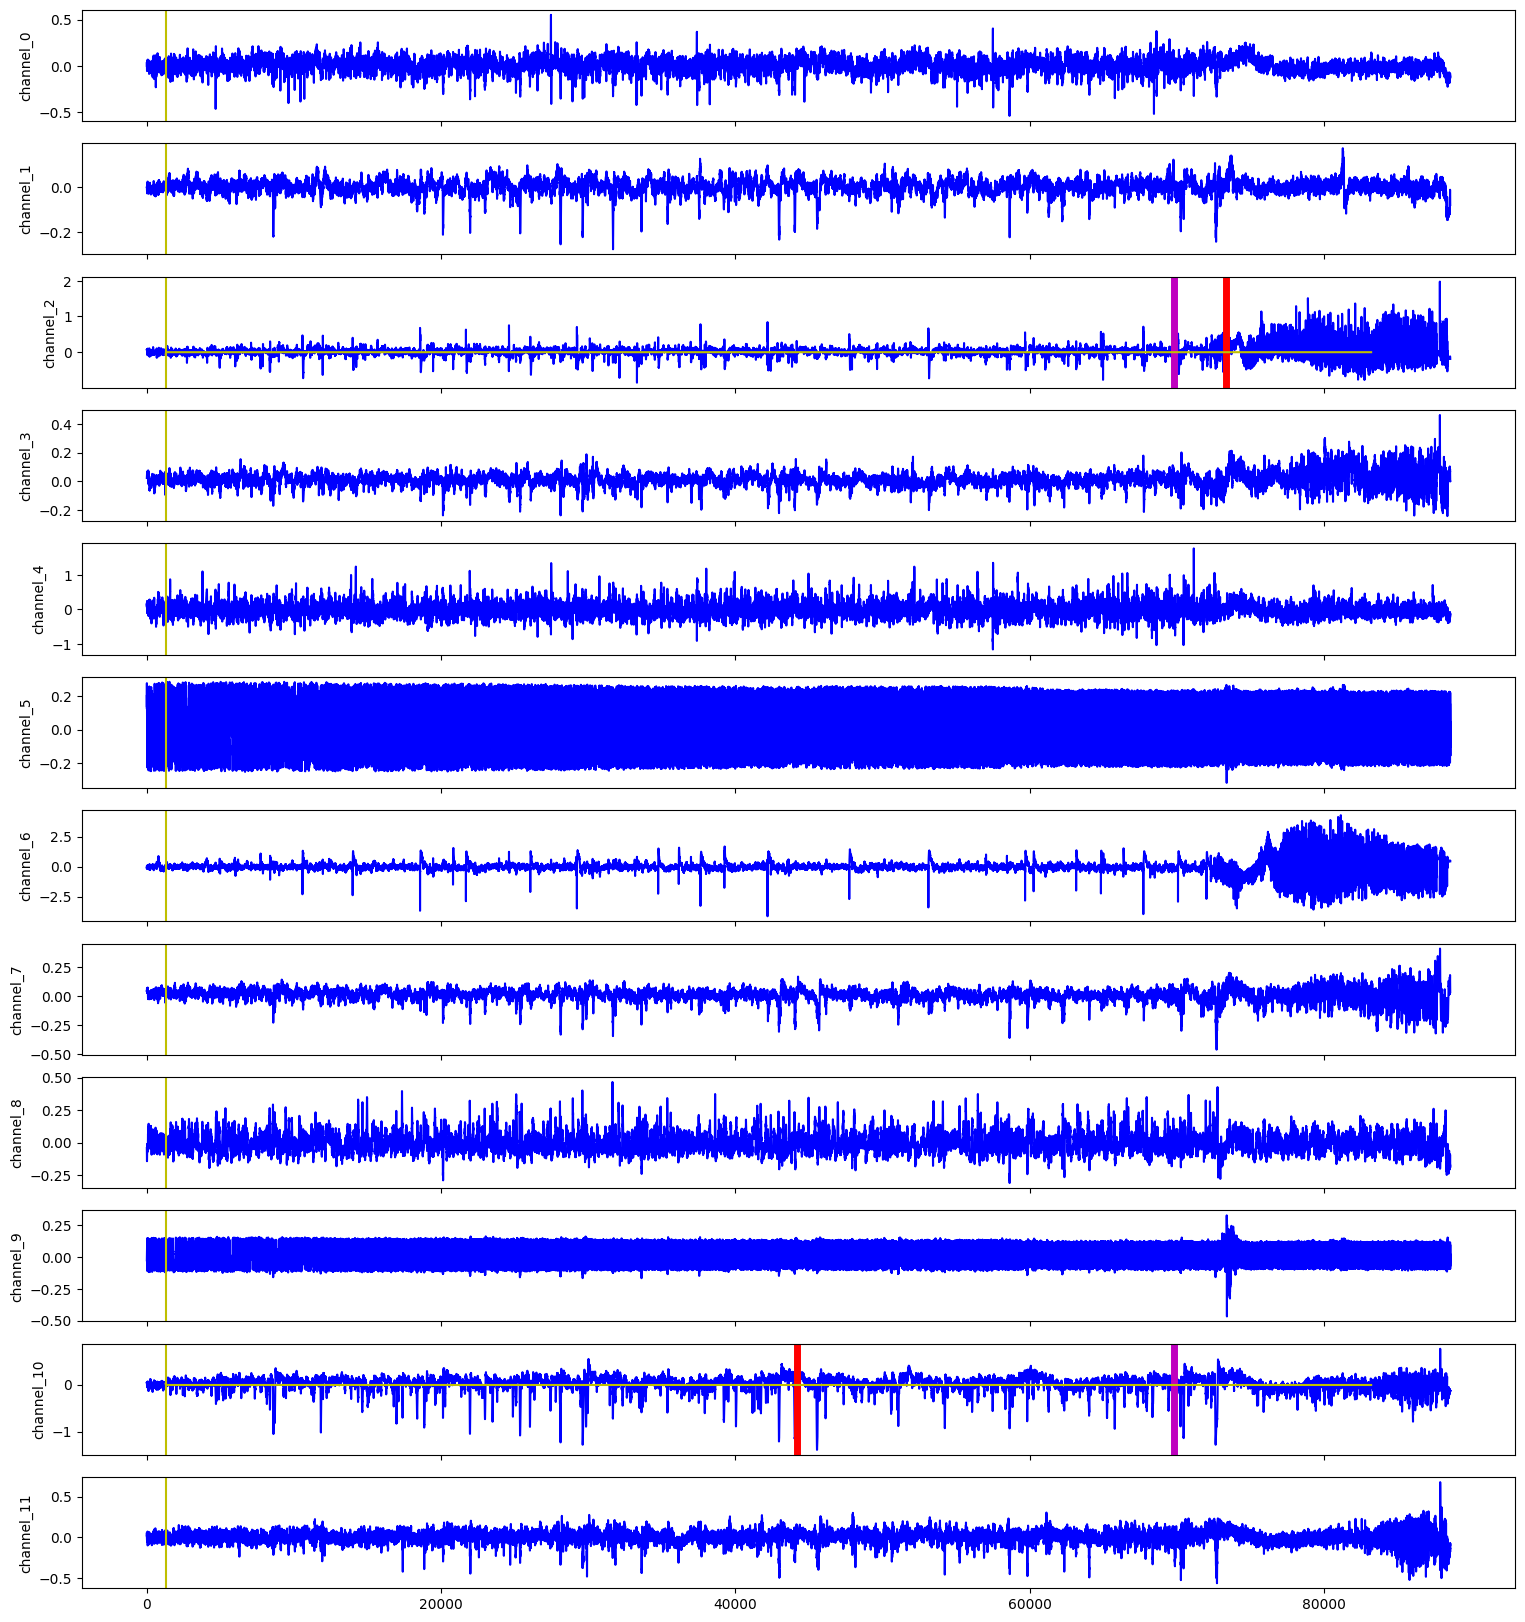

In [37]:
warmup = 10 * 128
actual_change = 76000 - (82176 - 76000)

time = [i for i in range(post_channels["channel_0"].shape[0])]

fig, axs = plt.subplots(len(post_channels), 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, post_channels[chan], 'b')
    
    axs[c].axvline(x=warmup, c='y')

    if chan in seiz_change_points:
        seiz_cpt = seiz_change_points[chan]
        axs[c].axvline(x=seiz_cpt, c='r', linewidth=5)
        axs[c].axvline(x=actual_change, c='m', linewidth=5)
        fore_time = [warmup + i for i in range(len(seiz_forecasts[chan]))]
        axs[c].plot(fore_time, seiz_forecasts[chan], 'y')

    axs[c].set_ylabel(chan)

print(actual_change)

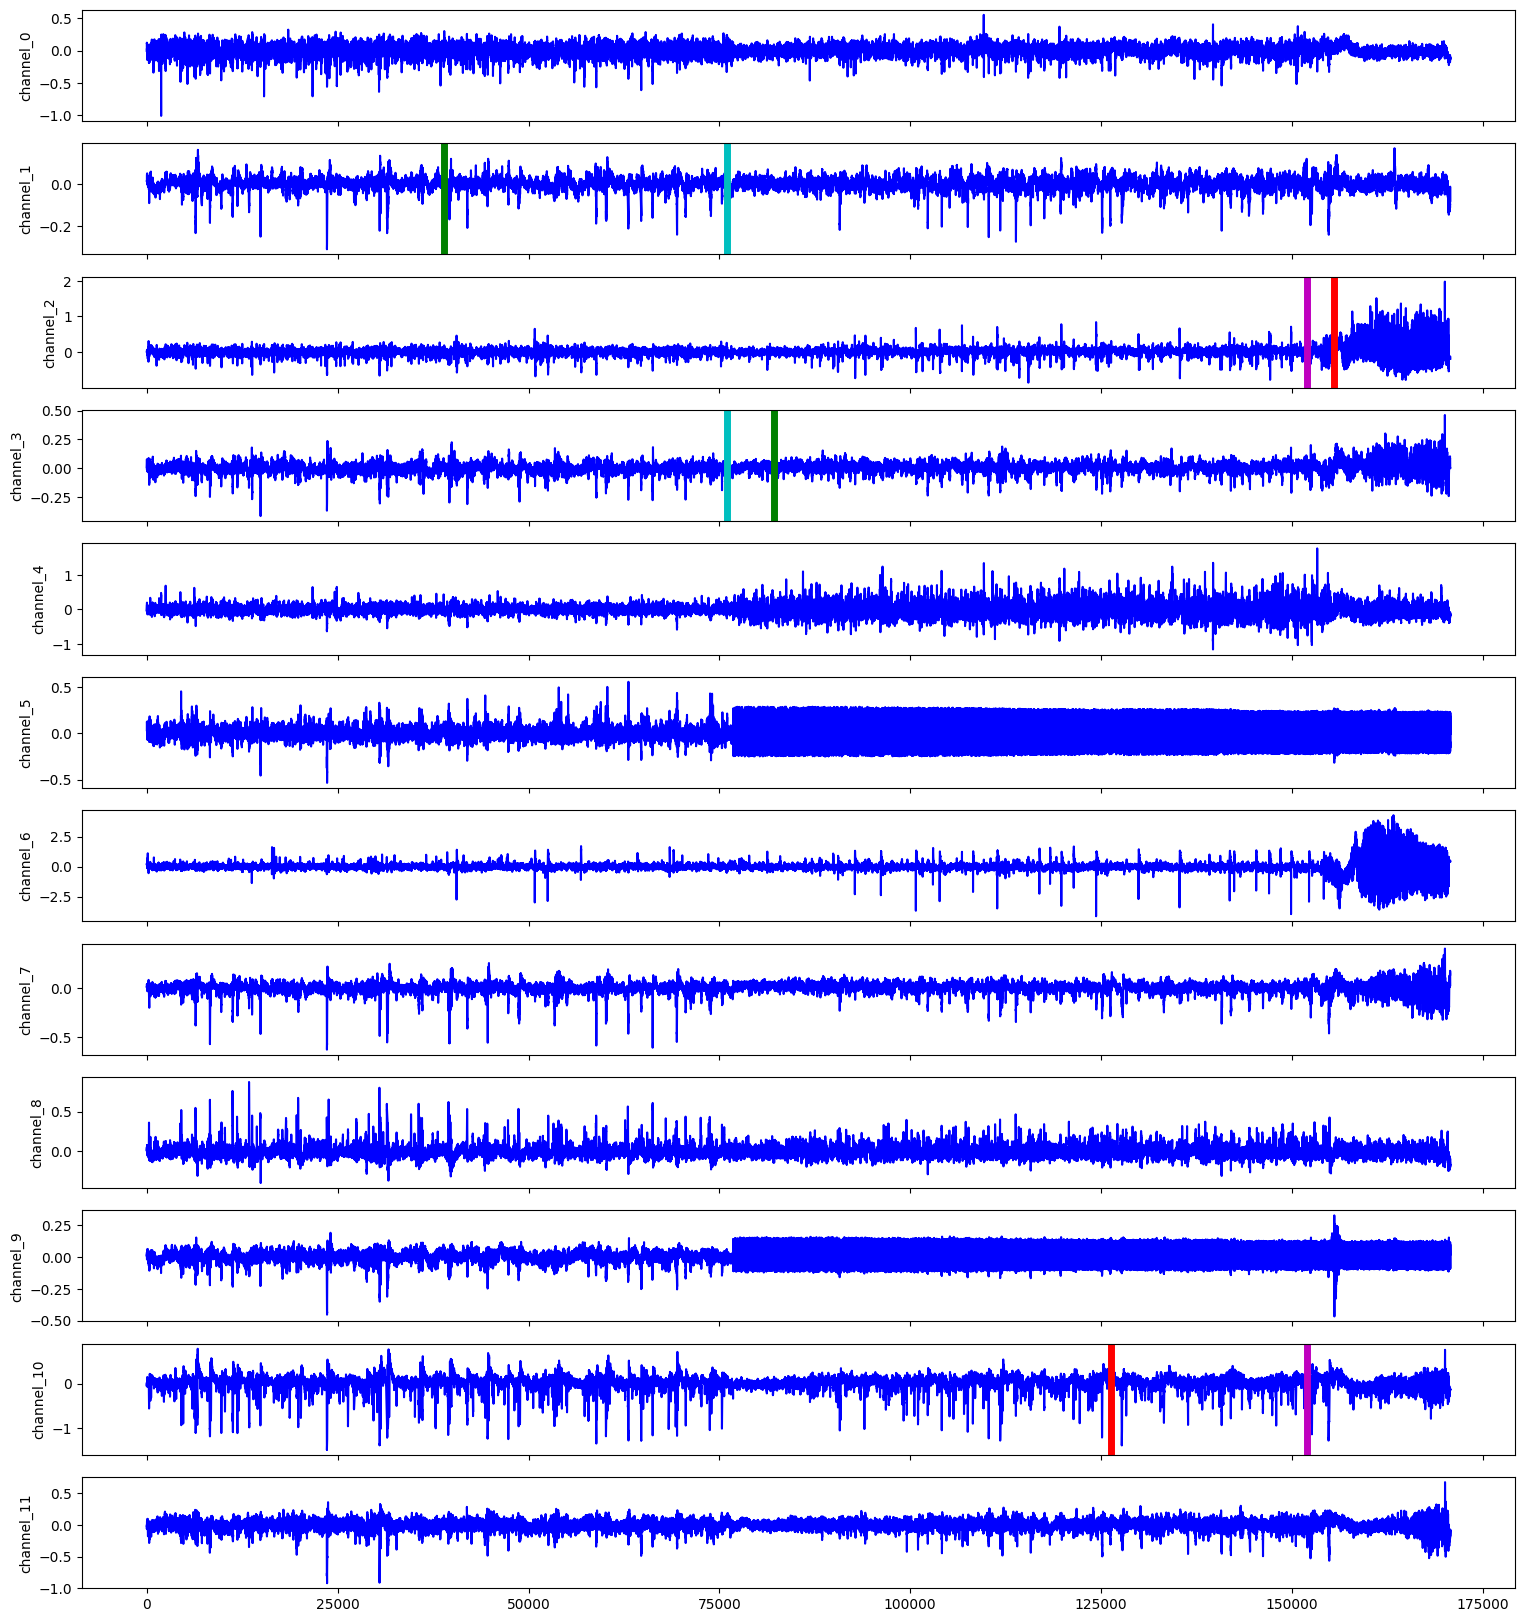

In [35]:
# bring it all together

time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(18.5, 20.5)

warmup1 = 15 * 128
cpt1 = max(change_points.values())
actual_change1 = 76000

warmup2 = cpt + (10 * 128)
actual_change2 = 76000 + 76000

# plot all change points found
for c in range(eeg_data.shape[0]):
    
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')

    # plot first change point
    if chan in change_points:
        cpt = change_points[chan]
        axs[c].axvline(x=cpt, c='g', linewidth=5)
        axs[c].axvline(x=actual_change1, c='c', linewidth=5)
        fore_time = [i for i in range(len(forecasts[chan]))]

    # plot second change point
    if chan in seiz_change_points:
        seiz_cpt = cpt1 + seiz_change_points[chan]
        axs[c].axvline(x=seiz_cpt, c='r', linewidth=5)
        axs[c].axvline(x=actual_change2, c='m', linewidth=5)
        fore_time = [cpt1 + i for i in range(len(seiz_forecasts[chan]))]


    axs[c].set_ylabel(chan)